# $CO_{2}$ Emission

In [1]:
# Import necessary libraries
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
data = pd.read_csv('data.csv')

In [3]:
# Show the data
data

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [4]:
# Define required variables
Volume = data['Volume']
Weight = data['Weight']
CO2 = data['CO2']

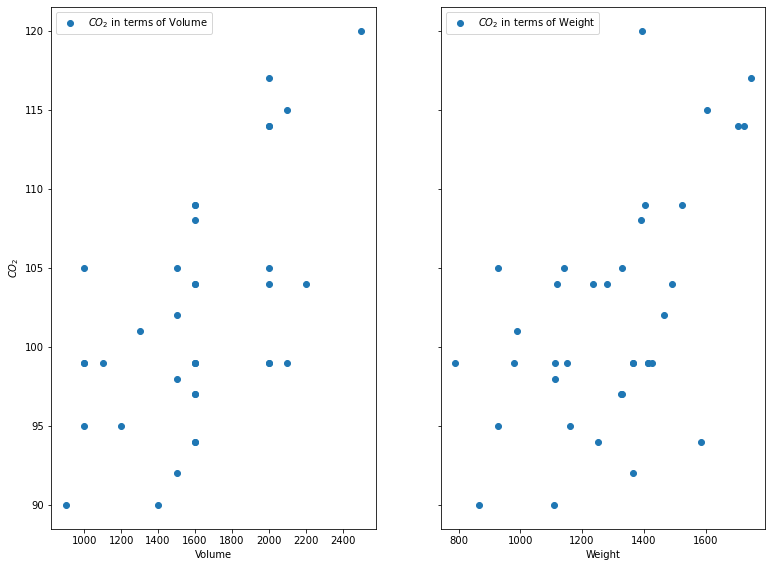

In [5]:
# Plot each feature in terms of the target
figure, ax = plt.subplots(1, 2, figsize=(12.8, 9.6), sharey=True)

ax[0].scatter(Volume, CO2, label=r'$CO_{2}$ in terms of Volume')
ax[1].scatter(Weight, CO2, label=r'$CO_{2}$ in terms of Weight')

ax[0].set_xlabel('Volume')
ax[0].set_ylabel(r'$CO_{2}$')
ax[0].legend(loc='best')

ax[1].set_xlabel('Weight')
ax[1].legend(loc='best')

plt.show()

In [6]:
# Independent Values
X = np.array(data[['Volume', 'Weight']])
# Dependent Values
y = np.array(data['CO2'])

In [7]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0)               # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma

    return X_norm

In [8]:
# Normalize X
X = zscore_normalize_features(X)

In [9]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost += (f_wb_i - y[i])**2             #scalar
    cost /= (2 * m)                            #scalar    
    return cost

In [10]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [11]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        
    return w, b # return final w, b

In [12]:
# initialize parameters
initial_w = np.zeros(2)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1e-1
# run gradient descent 
w_final, b_final = gradient_descent(X, y, initial_w, initial_b,
                                    compute_cost, compute_gradient, 
                                    alpha, iterations)
print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final} ")

b, w found by gradient descent: 102.03, [2.99358608 1.80269333] 


As the result, our model is:
$$y = 3 \ x_{1} + 1.8 \ x_{2} + 102.03 \qquad \begin{cases}y \equiv \mathrm{CO_{2}} \\ x_{1} \equiv \text{Volume} \\ x_{2} \equiv \text{Weight} \end{cases}$$